In [2]:
import pandas as pd
import numpy as np


pd.set_option('display.notebook_repr_html', False)


adams_act = pd.DataFrame(
                [
                  [12, 92],
                  [13, 65],
                  [14, 96]
                ],
                   columns=['Date', 'Act'])
print(adams_act)

   Date  Act
0    12   92
1    13   65
2    14   96


In [4]:
# 각 열에서 최소값이 위치한 인덱스
adams_act.idxmin()

Date    0
Act     1
dtype: int64

In [6]:
#각 행에서 최소값이 위치한 인덱스
adams_act.idxmin(axis=1)

0    Date
1    Date
2    Date
dtype: object

In [8]:
# 각 열에서 최대값이 위치한 인덱스
adams_act.idxmax()

Date    2
Act     2
dtype: int64

In [10]:
adams_act.cummin()

   Date  Act
0    12   92
1    12   65
2    12   65

In [12]:
adams_act.cummax()

   Date  Act
0    12   92
1    13   92
2    14   96

In [14]:
adams_act.cumsum()

   Date  Act
0    12   92
1    25  157
2    39  253

In [16]:
adams_act.cumprod()

   Date     Act
0    12      92
1   156    5980
2  2184  574080

In [18]:
adams_act.diff()

   Date   Act
0   NaN   NaN
1   1.0 -27.0
2   1.0  31.0

In [20]:
adams_act.pct_change()

       Date       Act
0       NaN       NaN
1  0.083333 -0.293478
2  0.076923  0.476923

In [22]:

adams_act.expanding()

Expanding [min_periods=1,axis=0,method=single]

In [24]:
adams_act.expanding(1)

Expanding [min_periods=1,axis=0,method=single]

In [26]:
adams_act.expanding().sum()

   Date    Act
0  12.0   92.0
1  25.0  157.0
2  39.0  253.0

In [28]:
adams_act.expanding(min_periods=2).sum()

   Date    Act
0   NaN    NaN
1  25.0  157.0
2  39.0  253.0

In [30]:
adams_act.expanding(3).sum()

   Date    Act
0   NaN    NaN
1   NaN    NaN
2  39.0  253.0

In [32]:
adams_act.expanding().mean()

   Date        Act
0  12.0  92.000000
1  12.5  78.500000
2  13.0  84.333333

In [34]:
adams_act.expanding(min_periods=3).sum()

   Date    Act
0   NaN    NaN
1   NaN    NaN
2  39.0  253.0

In [36]:
# 직전 1개와 현재 값의 합 구하기
adams_act.rolling(window=2).sum()

   Date    Act
0   NaN    NaN
1  25.0  157.0
2  27.0  161.0

In [38]:
# 직전 1개와 현재 값의 평균 구하기
adams_act.rolling(window=2).mean()

   Date   Act
0   NaN   NaN
1  12.5  78.5
2  13.5  80.5

In [40]:
# 직전 2개와 현재 값의 합 구하기
adams_act.rolling(window=3).sum()

   Date    Act
0   NaN    NaN
1   NaN    NaN
2  39.0  253.0

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.notebook_repr_html', False)


# 데이터 로딩
df = pd.read_csv("C://Users/302-24/Downloads/kr_population_error .csv", index_col=0, parse_dates=True)
df[:15]

             population     birth     death increments  birthrate
Year                                                             
1925-01-01  12,997,611   558,897   359,042    199,855        6.59
1926-01-01  13,052,741   511,667   337,948    173,719         NaN
1927-01-01  13,037,169   534,524   353,818    180,706         NaN
1928-01-01  13,105,131   566,142   357,701    208,441         NaN
1929-01-01  13,124,279   566,969   414,366    152,603         NaN
1930-01-01  13,880,469   587,144   322,611    264,533        6.41
1931-01-01  13,895,052   589,428   346,800    242,628         NaN
1932-01-01  14,117,191   600,545   384,287    216,258         NaN
1933-01-01  14,229,277   607,021   336,232    270,789         NaN
1934-01-01  14,449,155   618,135   356,515    261,620         NaN
1935-01-01  15,061,960   646,158   377,454    268,704        6.60
1936-01-01  15,114,775   639,355   381,806    257,549         NaN
1937-01-01  15,235,383   636,839   342,575    294,264         NaN
1938-01-01

In [7]:
# 쉼표 제거 후 숫자로 변환
df['birth'] = df['birth'].replace({',': ''}, regex=True).astype(float)

# rolling mean 계산
result = df['birth'].rolling(window=10).mean()[:15]
print(result)

Year
1925-01-01         NaN
1926-01-01         NaN
1927-01-01         NaN
1928-01-01         NaN
1929-01-01         NaN
1930-01-01         NaN
1931-01-01         NaN
1932-01-01         NaN
1933-01-01         NaN
1934-01-01    574047.2
1935-01-01    582773.3
1936-01-01    595542.1
1937-01-01    605773.6
1938-01-01    606089.3
1939-01-01    607940.6
Name: birth, dtype: float64


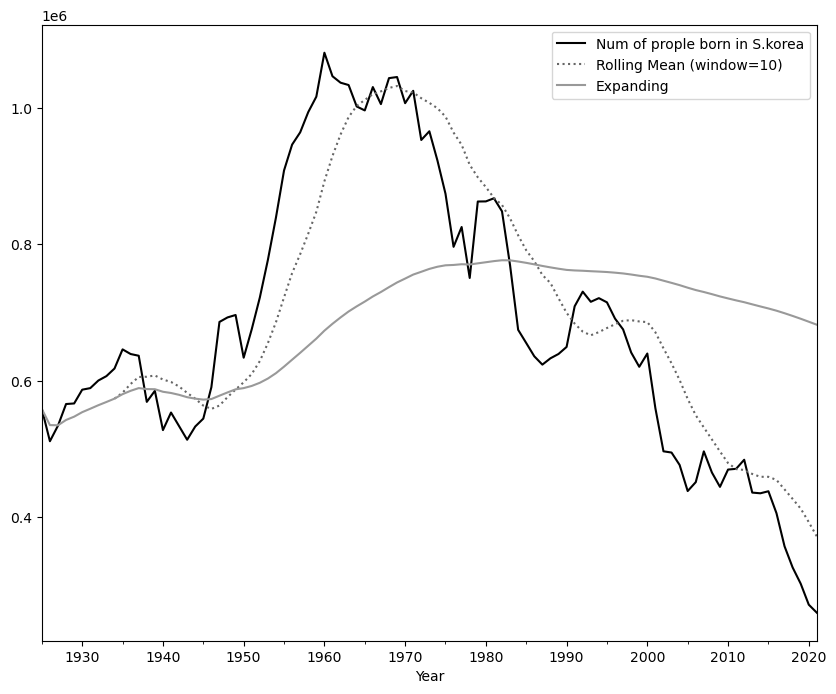

In [14]:
plt.style.use('grayscale')
plt.figure(facecolor='white')

# 연도별 출생자수
df['birth'].plot(label='Num of prople born in S.korea',
                 linestyle='-', figsize=(10,8))

# 연도별 출생자수 10년 이동 평균해, 선을 부드럽게 그리기
df['birth'].rolling(window=10).mean().plot(label='Rolling Mean (window=10)', 
                 linestyle=":")

# 누적 평균 그리기
df['birth'].expanding().mean().plot(label='Expanding', linestyle="-")
plt.legend()

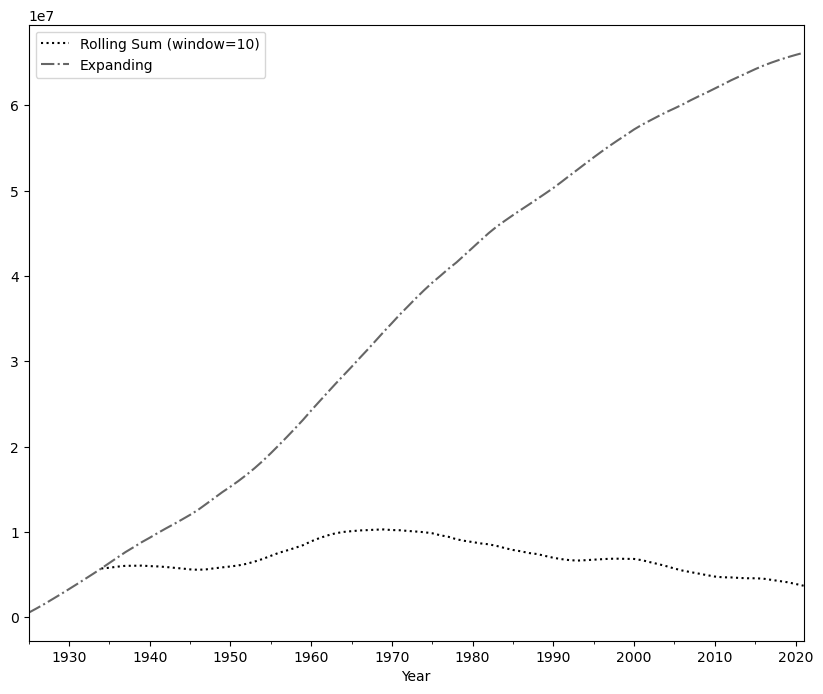

In [53]:
plt.style.use('grayscale')
plt.figure(facecolor='white')

# 10년간 누적 출생자수 계산
df['birth'].rolling(window=10).sum().plot(label='Rolling Sum (window=10)',
                  linestyle=":", figsize=(10,8))

# 누적 출생자수를 그리기
df['birth'].expanding().sum().plot(label='Expanding', linestyle="-.")
plt.legend()

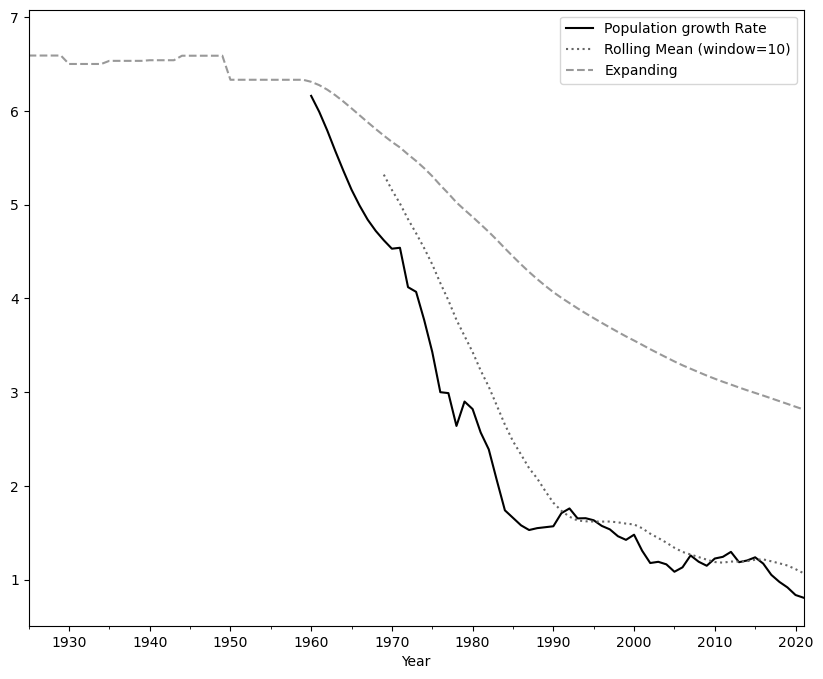

In [55]:
plt.style.use('grayscale')
plt.figure(facecolor='white')

# 연도별 출산율
df['birthrate'].plot(label='Population growth Rate', 
                  linestyle='-', figsize=(10,8))

# 연도별 출산율 10년 이동 평균해, 선을 부드럽게 그리기
df['birthrate'].rolling(window=10).mean().plot(
                 label='Rolling Mean (window=10)', linestyle=":")

# 누적 평균을 그리기
df['birthrate'].expanding().mean().plot(label='Expanding', linestyle="--")
plt.legend()

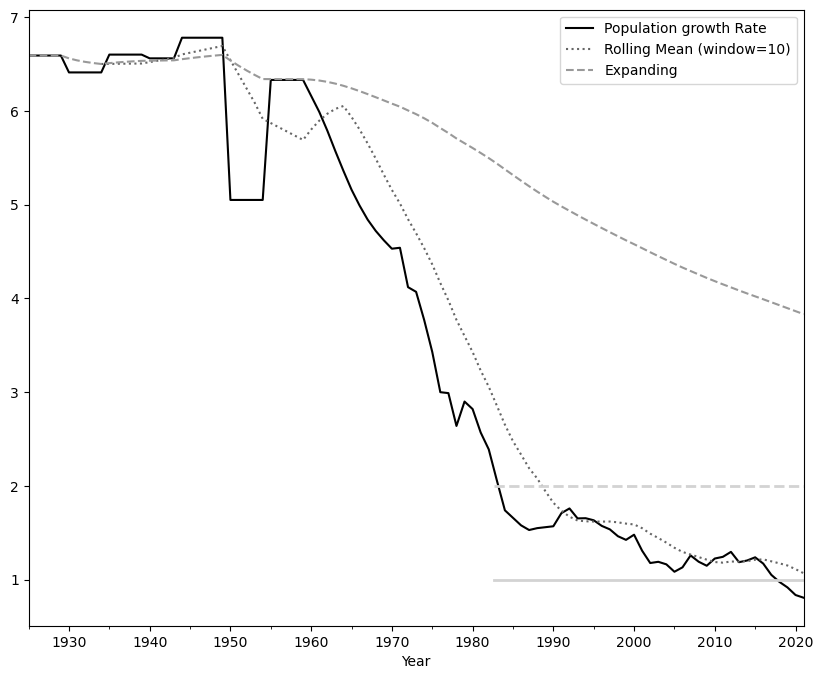

In [59]:
import matplotlib.pyplot as plt

plt.style.use('grayscale')
plt.figure(facecolor='white')

# fillna 대신 ffill 사용
# 연도별 출산율
df['birthrate'].ffill().plot(label='Population growth Rate',
                 linestyle='-', figsize=(10,8))

# 연도별 출산율 10년 이동 평균해, 선을 부드럽게 그리기
df['birthrate'].ffill().rolling(window=10).mean().plot(
            label='Rolling Mean (window=10)', linestyle=":")

# 누적 평균을 그리기
df['birthrate'].ffill().expanding().mean().plot(
                 label='Expanding', linestyle="--")

# 기준선을 추가
plt.axhline(y=2.0, xmin=0.6, xmax=1.0, color='lightgray',
                  linestyle='--', linewidth=2)
plt.axhline(y=1.0, xmin=0.6, xmax=1.0, color='lightgray',
                  linestyle='-', linewidth=2)

# 범례 추가
plt.legend()
plt.show()